# Problem statement

During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

# Approach

This project includes Data cleaning, EDA, SMOTE, Feature selection, Modeling using various algorithms in order to get the best out of the avaialable data.


Content:
1. Data Cleaning

    1.1. Handling Null values
    
    1.2. Feature engineering


2. EDA

    2.1. Univariate

    2.2. Bivariate

    2.3. Handling outliers


3. Modelling

    3.1. SMOTE
    
    3.2. Modelling using all features
    
    3.3. Modelling with Feature selection using mutual information
    
    3.4. Modelling with Feature selection using chi2 test


4. Conclusion

# 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Covid Data.csv')
df.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## 1.1. Handling Null Values

In [3]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [4]:
df.replace({99:np.NaN,98:np.NaN,97:np.NaN},inplace=True)

In [5]:
df.isnull().sum()/len(df)*100

# Remove INTUBED,PREGNANT,ICU

USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
DATE_DIED                0.000000
INTUBED                 81.622106
PNEUMONIA                1.526166
AGE                      0.032902
PREGNANT                50.283957
DIABETES                 0.318337
COPD                     0.286389
ASTHMA                   0.284100
INMSUPR                  0.324631
HIPERTENSION             0.296021
OTHER_DISEASE            0.481129
CARDIOVASCULAR           0.293350
OBESITY                  0.289154
RENAL_CHRONIC            0.286675
TOBACCO                  0.307083
CLASIFFICATION_FINAL     0.000000
ICU                     81.637651
dtype: float64

In [6]:
df.drop(['INTUBED','PREGNANT','ICU'],axis=1,inplace=True)

In [7]:
df.shape

(1048575, 18)

In [8]:
df=df.dropna()
df.shape

# Almost 2% of the data is lost

(1024829, 18)

In [9]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64

## 1.2. Feature engineering

#### Changing values to 0s and 1s

In [10]:
df_temp=df.drop(['MEDICAL_UNIT','DATE_DIED','AGE','CLASIFFICATION_FINAL'],axis=1)
df_temp.head()

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,2,1,1,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
1,2,2,1,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
2,2,2,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2,2,1,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0


In [11]:
df_temp.replace({1:1,2:0,1.0:1,2.0:0},inplace=True)
df_temp.head()

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_t=df[['MEDICAL_UNIT','DATE_DIED','AGE','CLASIFFICATION_FINAL']]
df_t.head(2)

,MEDICAL_UNIT,DATE_DIED,AGE,CLASIFFICATION_FINAL
0,1,03/05/2020,65.0,3
1,1,03/06/2020,72.0,5


In [13]:
df=pd.concat([df_temp,df_t],axis=1)
df.head(2)

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,MEDICAL_UNIT,DATE_DIED,AGE,CLASIFFICATION_FINAL
0,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,03/05/2020,65.0,3
1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,03/06/2020,72.0,5


In [14]:
df['DATE_DIED']=df['DATE_DIED'].apply(lambda x: 0 if x=='9999-99-99'  else 1)
df['DATE_DIED'].value_counts()

0    950217
1     74612
Name: DATE_DIED, dtype: int64

In [15]:
df.rename(columns={'DATE_DIED':'DIED'},inplace=True)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(179266, 18)

# 2. EDA

In [18]:
df.rename(columns={'USMER':'MEDICALUNIT_LEVEL','PATIENT_TYPE':'HOSPITALIZED','CLASIFFICATION_FINAL':'COVID_TEST_RESULT'},inplace=True)

In [19]:
df.head(2)

,MEDICALUNIT_LEVEL,SEX,HOSPITALIZED,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,MEDICAL_UNIT,DIED,AGE,COVID_TEST_RESULT
0,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,65.0,3
1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,72.0,5


## 2.1 Univariate Analysis

In [20]:
df.dtypes

MEDICALUNIT_LEVEL      int64
SEX                    int64
HOSPITALIZED           int64
PNEUMONIA            float64
DIABETES             float64
COPD                 float64
ASTHMA               float64
INMSUPR              float64
HIPERTENSION         float64
OTHER_DISEASE        float64
CARDIOVASCULAR       float64
OBESITY              float64
RENAL_CHRONIC        float64
TOBACCO              float64
MEDICAL_UNIT           int64
DIED                   int64
AGE                  float64
COVID_TEST_RESULT      int64
dtype: object

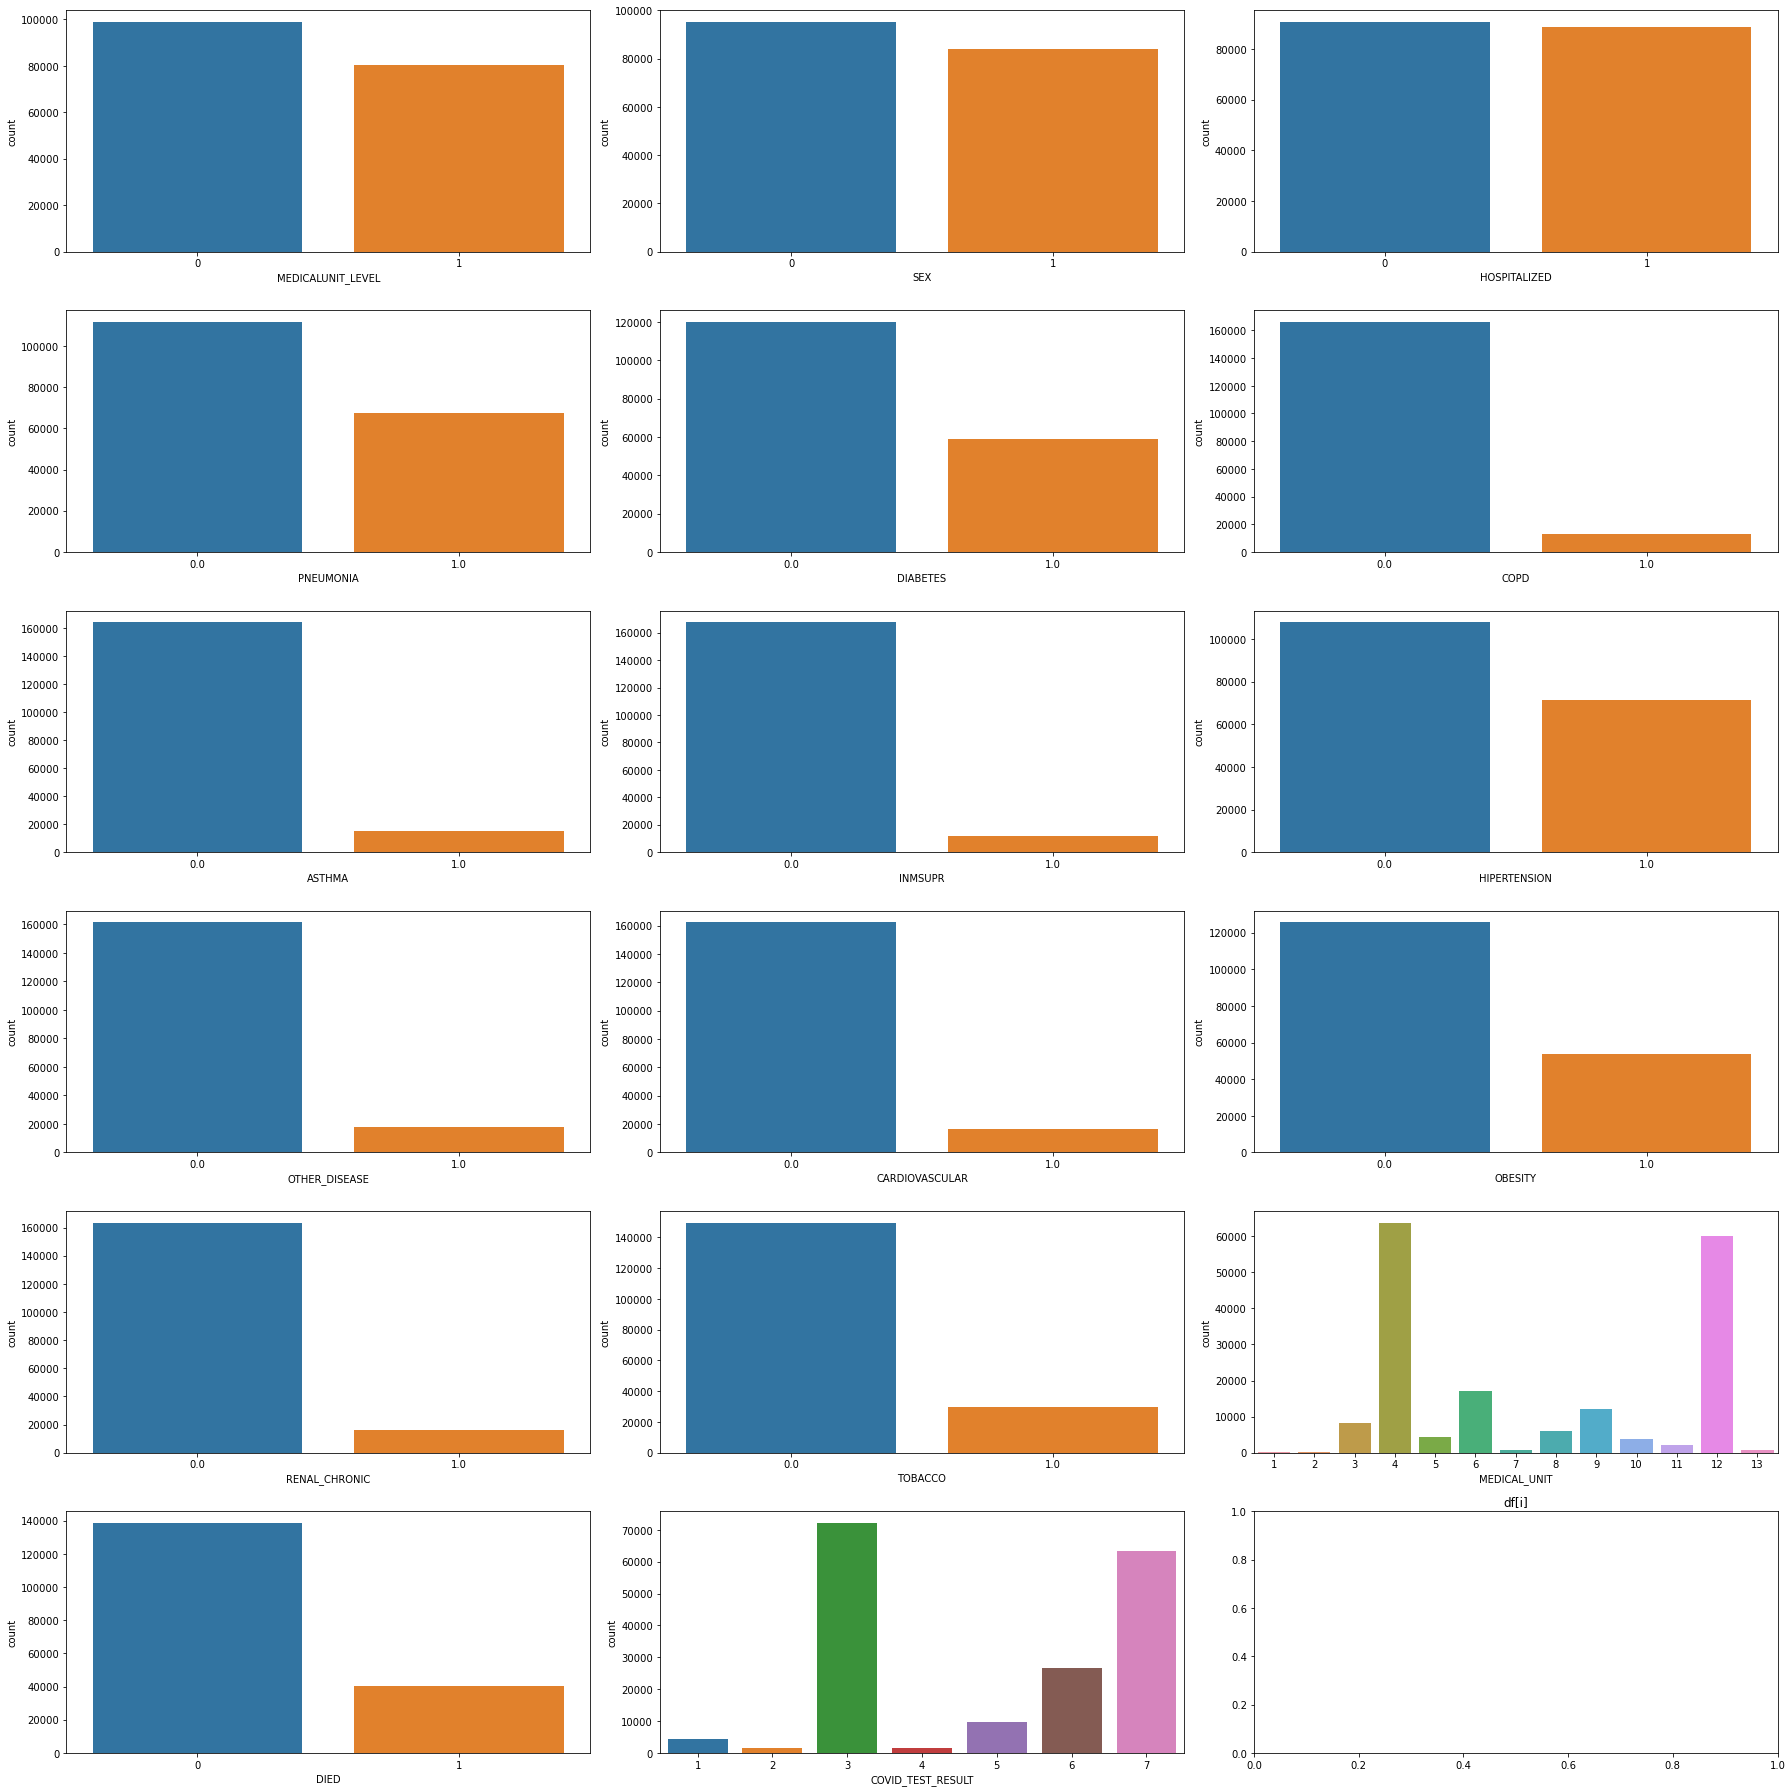

In [21]:
cols=list(df.select_dtypes(include=np.number).columns)
cols.remove('AGE')
fig,ax=plt.subplots(6,3,figsize=(25,25))

for i, subplot in zip(cols, ax.flatten()):
    sns.countplot(df[i],ax=subplot)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='AGE'>

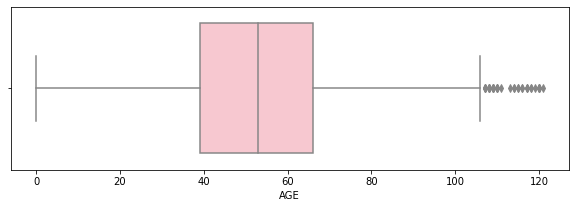

In [22]:
plt.figure(figsize=(10,3))
sns.boxplot(df['AGE'],color='pink')

## 2.2 Bivariate Analysis

In [23]:
df.columns

Index(['MEDICALUNIT_LEVEL', 'SEX', 'HOSPITALIZED', 'PNEUMONIA', 'DIABETES',
       'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
       'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'MEDICAL_UNIT',
       'DIED', 'AGE', 'COVID_TEST_RESULT'],
      dtype='object')

In [24]:
cols.remove('DIED')

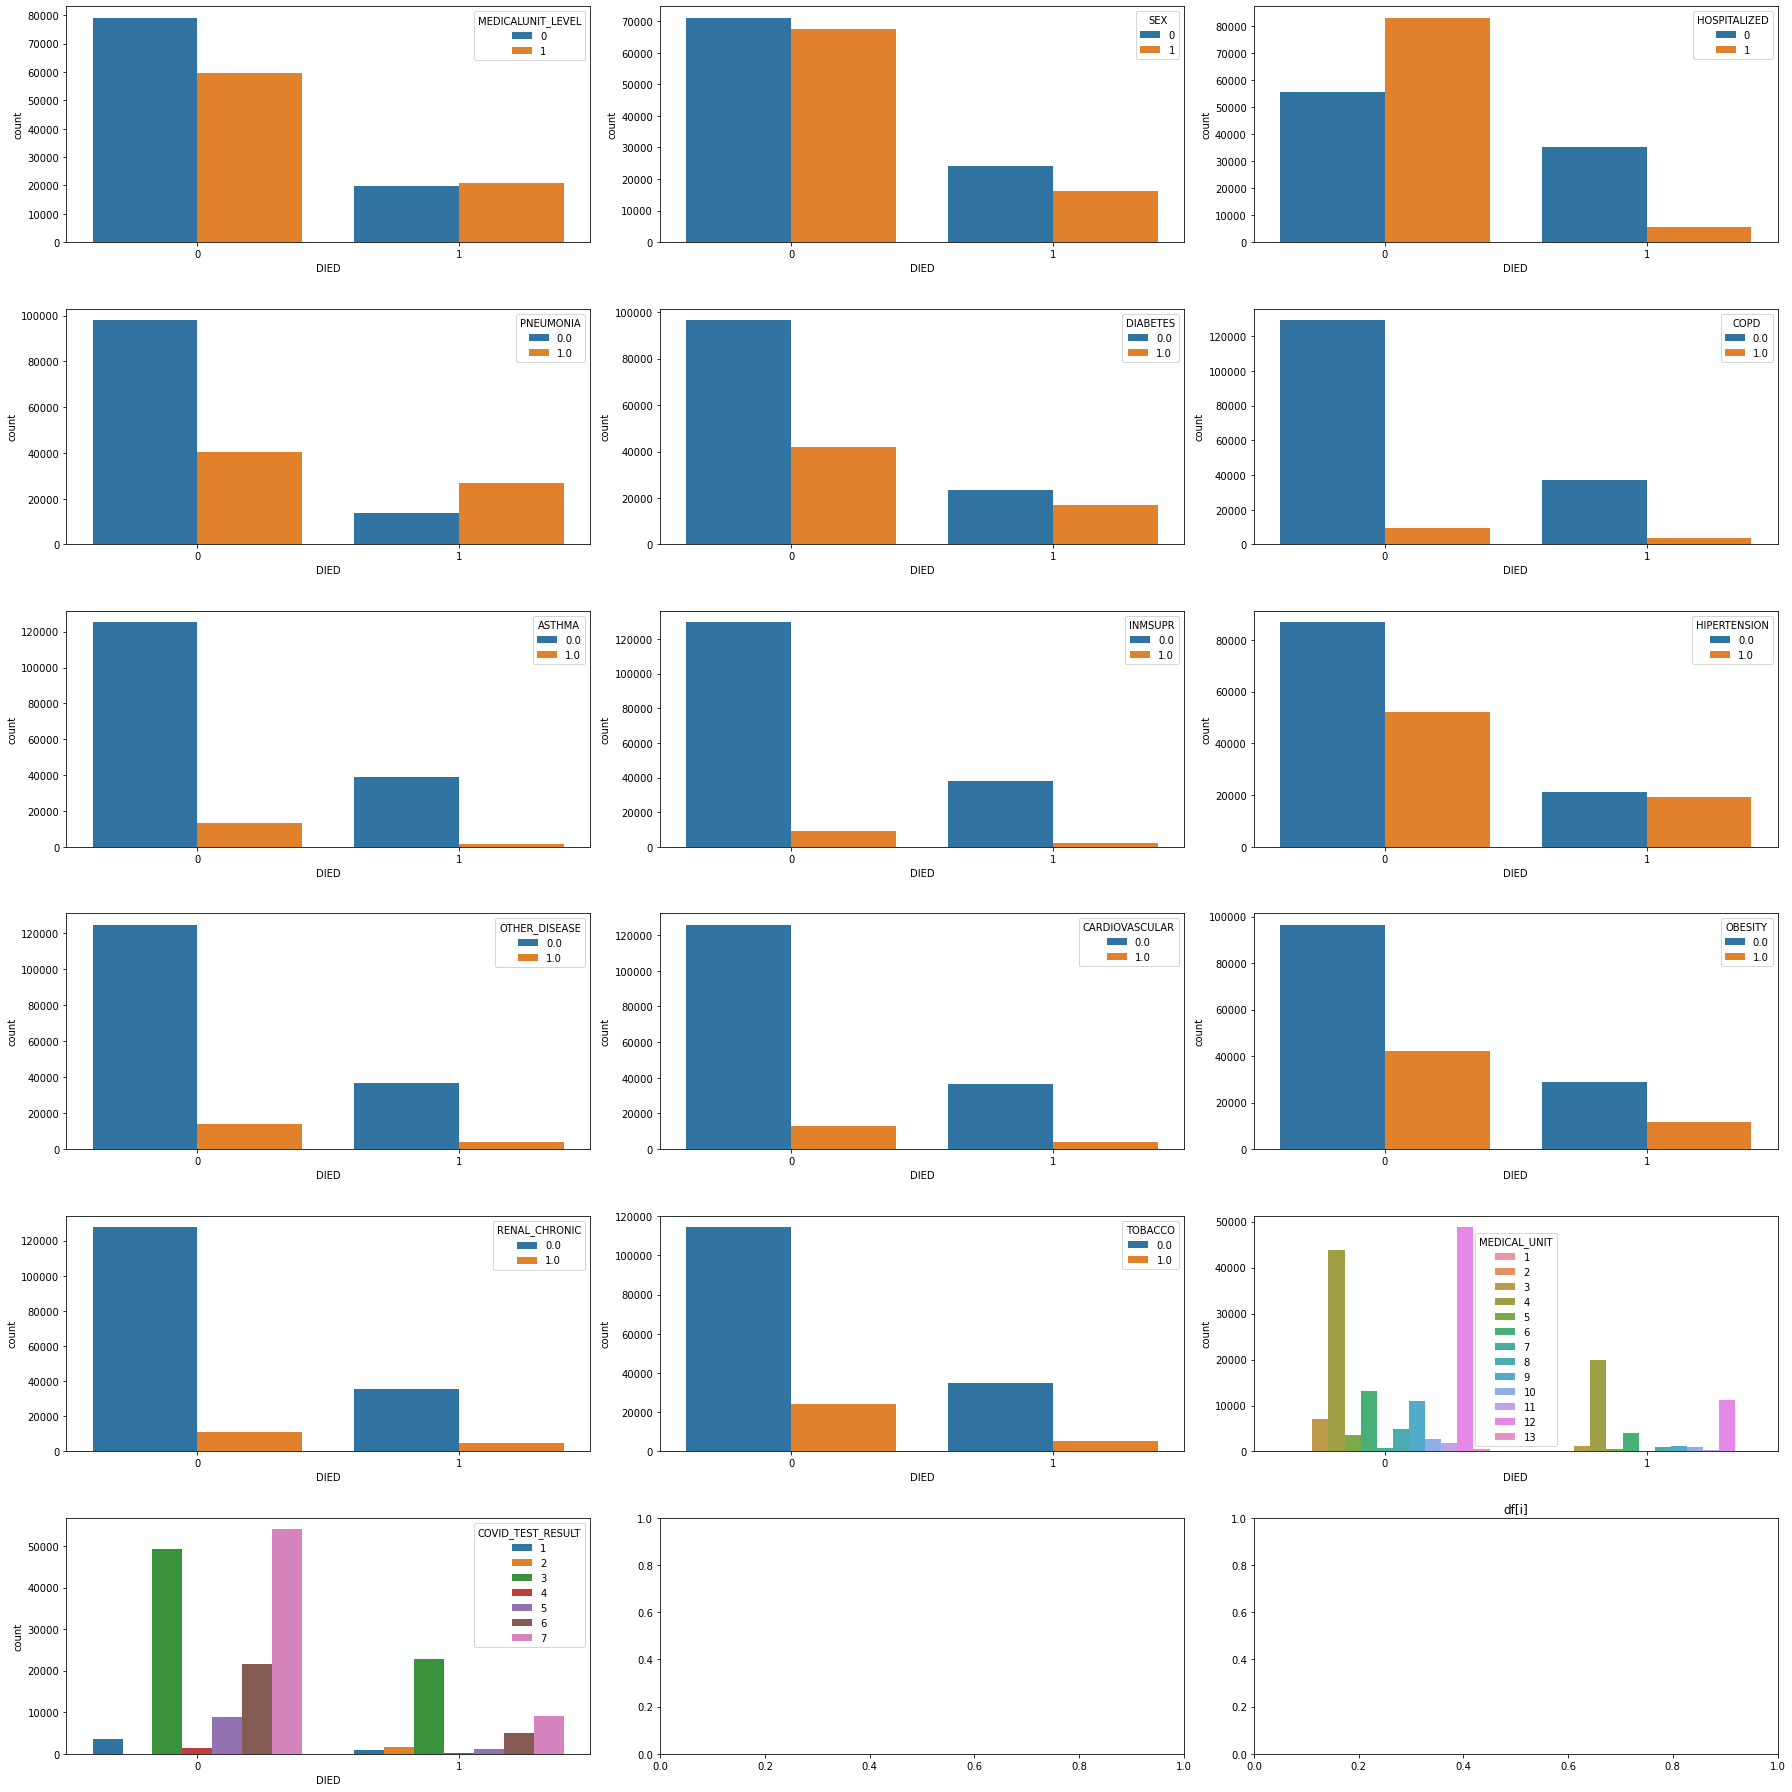

In [25]:
fig,ax=plt.subplots(6,3,figsize=(25,25))

for i, subplot in zip(cols, ax.flatten()):
    sns.countplot(df['DIED'],hue=df[i],ax=subplot)
    plt.title('df[i]')
plt.tight_layout()
plt.show()

In [26]:
# USMER: 0 is medical unit 1 and 1 is medical unit 2
# SEX: 0 is Male and 1 is Female
# PATIENT_TYPE: 0 is Returned home and 1 is Hospitalization
# MEDICAL_UNIT: Type of institution that provided care
# CLASSIFICATION: covid test findings. 1-3 mean patient was diagnosed with covid in different degrees. 
#                 4 or higher means patient is not a carrier of covid or that the test is inconclusive.

<AxesSubplot:xlabel='DIED', ylabel='AGE'>

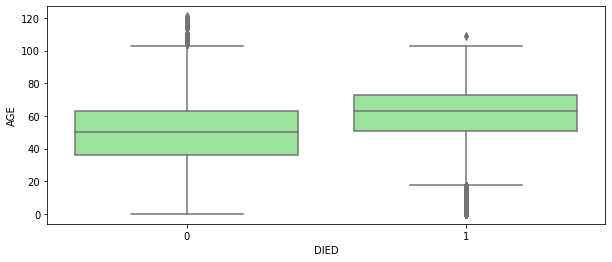

In [27]:
plt.figure(figsize=(10,4))
sns.boxplot(df['DIED'],df['AGE'],color='lightgreen')

## 2.3 handling outliers

In [28]:
df[df['AGE']>100].head(2)

# very few so can be removed

,MEDICALUNIT_LEVEL,SEX,HOSPITALIZED,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,MEDICAL_UNIT,DIED,AGE,COVID_TEST_RESULT
2360,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,103.0,3
10732,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,101.0,6


In [29]:
indexAge = df[df['AGE'] > 100].index
df.drop(indexAge , inplace=True)
df.head(2)

,MEDICALUNIT_LEVEL,SEX,HOSPITALIZED,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,MEDICAL_UNIT,DIED,AGE,COVID_TEST_RESULT
0,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,65.0,3
1,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,72.0,5


# 3. Model Building

### user defined functions

In [30]:
cols_per = ["Model", "Accuracy_train",'Accuracy',"Recall","Precision",'F1','AUC']
result_per = pd.DataFrame(columns = cols_per)
def metrics_table(model,ytrain_bal,ypred_train,ytest,ypred_test):
    
    accuracy_train   =accuracy_score(ytrain_bal,ypred_train)
    accuracy_test    =accuracy_score(ytest,ypred_test)
    recall           =recall_score(ytest,ypred_test)
    precision        =precision_score(ytest,ypred_test)
    auc              =roc_auc_score(ytest,ypred_test)
    F1               =f1_score(ytest,ypred_test)
    
    model_per = pd.Series({"Model": model,
                        "Accuracy_train":accuracy_train,
                       "Accuracy":accuracy_test,
                        "Recall":recall,
                        "Precision":precision,
                        'F1':F1,
                        "AUC":auc
                        })

    global result_per 
    result_per= result_per.append(model_per, ignore_index = True)

    return(result_per)

### Splitting the data

In [31]:
from sklearn.model_selection import train_test_split

X=df.drop('DIED',axis=1)
y=df['DIED']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
xtrain.shape

(143330, 17)

### 3.1 SMOTE to balance the data

In [33]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
xtrain_bal,ytrain_bal=smote.fit_resample(xtrain,ytrain)

In [34]:
ytrain.shape

(143330,)

In [35]:
ytrain_bal.shape

(222036,)

## 3.2 Feature selection: Using all features

### 3.2.1. LogisticRegression

In [36]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,classification_report,confusion_matrix,f1_score

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(xtrain_bal,ytrain_bal)

ypred_lr_train=lr.predict(xtrain_bal)
ypred_lr=lr.predict(xtest)

In [38]:
print(confusion_matrix(ytest,ypred_lr))

[[19825  7778]
 [ 1805  6425]]


In [39]:
metrics_table("Logistic Reg",ytrain_bal, ypred_lr_train,ytest,ypred_lr)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945


### 3.2.2. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt=DecisionTreeClassifier(random_state=1)

dt.fit(xtrain_bal,ytrain_bal)

ypred_dt_train=dt.predict(xtrain_bal)
ypred_dt=dt.predict(xtest)
print(confusion_matrix(ytest,ypred_dt))



[[21948  5655]
 [ 5653  2577]]


In [41]:
metrics_table("Decision Tree",ytrain_bal, ypred_dt_train,ytest,ypred_dt)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127


In [42]:
dt.tree_.max_depth

56

#### hyperparameter tuning for Decision tree

In [43]:
# from sklearn.model_selection import GridSearchCV
# dt=DecisionTreeClassifier(random_state=1)
# params={'max_depth':[30,40],
#         'min_samples_leaf':[15,20,25],
#         'min_samples_split':[30,40,50]}
# GS = GridSearchCV(estimator=dt,param_grid=params,cv=5,scoring='recall')

In [44]:
# GS.fit(xtrain_bal,ytrain_bal)

In [45]:
# GS.best_params_

In [46]:
dt=DecisionTreeClassifier(max_depth=30,min_samples_leaf=25,min_samples_split=30,random_state=1)

dt.fit(xtrain_bal,ytrain_bal)

ypred_dt1_train=dt.predict(xtrain_bal)
ypred_dt1=dt.predict(xtest)

In [47]:
metrics_table("tuned Decision Tree",ytrain_bal, ypred_dt1_train,ytest,ypred_dt1)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822


### 3.2.3. Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10,random_state=1)

rf.fit(xtrain_bal,ytrain_bal)

ypred_rf_train=rf.predict(xtrain_bal)
ypred_rf=rf.predict(xtest)

In [49]:
metrics_table("Random Forest",ytrain_bal, ypred_rf_train,ytest,ypred_rf)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321


#### hyperparameter tuning for Random Forest

In [50]:
# params =             [{'criterion': ['entropy', 'gini'],
#                      'n_estimators': [50],
#                      'max_depth': [10, 15],
#                      'min_samples_split': [20, 10],
#                      'min_samples_leaf': [5, 9],
#                      'max_leaf_nodes': [8, 11]}]

# # n_estimators is the no: of decision trees.

In [51]:
# from sklearn.model_selection import GridSearchCV
# rf =RandomForestClassifier(random_state=1)

# rf_cv = GridSearchCV(rf,params,cv=5,scoring='recall')

# rf_cv.fit(xtrain_bal,ytrain_bal)

# rf_cv.best_params_

In [52]:
rf_model = RandomForestClassifier(criterion= 'entropy',
                                  max_depth= 10,
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 5,
                                  min_samples_split = 20,
                                  n_estimators= 50)


rf_model.fit(xtrain_bal,ytrain_bal)
ypred_rf_train_1=rf_model.predict(xtrain_bal)
ypred_rf_1 = rf_model.predict(xtest)

In [53]:
metrics_table("tuned Random Forest",ytrain_bal, ypred_rf_train_1,ytest,ypred_rf_1)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558


## 3.3. Feature selection: using mutual information/Information gain

In [58]:
from sklearn.feature_selection import mutual_info_classif

#mutual_info_classif(xtrain_bal,ytrain_bal)

In [59]:
val=pd.DataFrame(mutual_info_classif(xtrain_bal,ytrain_bal))

In [60]:
val.index=xtrain.columns

In [61]:
val.sort_values(0,ascending=False)

,0
HOSPITALIZED,0.159894
AGE,0.124433
PNEUMONIA,0.115607
COVID_TEST_RESULT,0.052040
HIPERTENSION,0.041662
DIABETES,0.041385
OBESITY,0.034953
MEDICAL_UNIT,0.029466
TOBACCO,0.027097
ASTHMA,0.025762


In [62]:
## droppping features
## selecting first 7
xtrain_bal_mi=xtrain_bal.drop(columns=['MEDICALUNIT_LEVEL','COPD','SEX','INMSUPR','RENAL_CHRONIC',
                    'OTHER_DISEASE','CARDIOVASCULAR','ASTHMA','TOBACCO'])


In [63]:
xtest_mi=xtest.drop(columns=['MEDICALUNIT_LEVEL','COPD','SEX','INMSUPR','RENAL_CHRONIC','OTHER_DISEASE','CARDIOVASCULAR','ASTHMA','TOBACCO'])

### 3.3.1. LogisticRegression

In [64]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,classification_report,confusion_matrix

In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(xtrain_bal_mi,ytrain_bal)

ypred_lr_train=lr.predict(xtrain_bal_mi)
ypred_lr=lr.predict(xtest_mi)

In [66]:
metrics_table("mutual info Logistic Reg",ytrain_bal, ypred_lr_train,ytest,ypred_lr)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724


### 3.3.2. Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt=DecisionTreeClassifier(random_state=1)

dt.fit(xtrain_bal_mi,ytrain_bal)

ypred_dt_train=dt.predict(xtrain_bal_mi)
ypred_dt=dt.predict(xtest_mi)

In [68]:
metrics_table("mutual info Decision Tree",ytrain_bal, ypred_dt_train,ytest,ypred_dt)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724
6,mutual info Decision Tree,0.875696,0.7497,0.552369,0.462415,0.503405,0.680452


#### hyperparameter tuning for Decision tree

In [69]:
# from sklearn.model_selection import GridSearchCV

# dt=DecisionTreeClassifier(random_state=1)

# params={'max_depth':[30,40],
#         'min_samples_leaf':[15,20,25],
#         'min_samples_split':[30,40,50]}
# GS = GridSearchCV(estimator=dt,param_grid=params,cv=5,scoring='recall')

In [70]:
# GS.fit(xtrain_bal_mi,ytrain_bal)

In [71]:
# GS.best_params_

In [72]:
dt=DecisionTreeClassifier(max_depth=30,min_samples_leaf=25,min_samples_split=30,random_state=1)

dt.fit(xtrain_bal_mi,ytrain_bal)

ypred_dt_train=dt.predict(xtrain_bal_mi)
ypred_dt=dt.predict(xtest_mi)

metrics_table("tuned mutual info Decision Tree",ytrain_bal, ypred_dt_train,ytest,ypred_dt)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724
6,mutual info Decision Tree,0.875696,0.7497,0.552369,0.462415,0.503405,0.680452
7,tuned mutual info Decision Tree,0.829784,0.751486,0.681774,0.471632,0.557559,0.727023


### 3.3.3. Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10,random_state=1)

rf.fit(xtrain_bal_mi,ytrain_bal)

ypred_rf_train=rf.predict(xtrain_bal_mi)
ypred_rf=rf.predict(xtest_mi)

In [74]:
metrics_table("mutual info Random Forest",ytrain_bal, ypred_rf_train,ytest,ypred_rf)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724
6,mutual info Decision Tree,0.875696,0.7497,0.552369,0.462415,0.503405,0.680452
7,tuned mutual info Decision Tree,0.829784,0.751486,0.681774,0.471632,0.557559,0.727023
8,mutual info Random Forest,0.873448,0.748081,0.585298,0.461797,0.516264,0.690957


#### hyperparameter tuning for Random Forest

In [75]:
# params =             [{'criterion': ['entropy', 'gini'],
#                      'n_estimators': [50],
#                      'max_depth': [10, 15],
#                      'min_samples_split': [20, 10],
#                      'min_samples_leaf': [5, 9],
#                      'max_leaf_nodes': [8, 11]}]

# n_estimators is the no: of decision trees.

In [76]:
# from sklearn.model_selection import GridSearchCV
# rf =RandomForestClassifier(random_state=1)

# rf_cv = GridSearchCV(rf,params,cv=5,scoring='recall')

# rf_cv.fit(xtrain_bal_mi,ytrain_bal)

# rf_cv.best_params_

In [77]:
rf_model = RandomForestClassifier(criterion= 'gini',
                                  max_depth= 10,
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 5,
                                  min_samples_split = 20,
                                  n_estimators= 50)


rf_model.fit(xtrain_bal_mi,ytrain_bal)
ypred_rf_train_1=rf_model.predict(xtrain_bal_mi)
ypred_rf_1 = rf_model.predict(xtest_mi)

In [78]:
metrics_table("tuned mutual info Random Forest",ytrain_bal, ypred_rf_train_1,ytest,ypred_rf_1)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724
6,mutual info Decision Tree,0.875696,0.7497,0.552369,0.462415,0.503405,0.680452
7,tuned mutual info Decision Tree,0.829784,0.751486,0.681774,0.471632,0.557559,0.727023
8,mutual info Random Forest,0.873448,0.748081,0.585298,0.461797,0.516264,0.690957
9,tuned mutual info Random Forest,0.788768,0.722156,0.828676,0.443837,0.578064,0.759536


In [79]:
result_per.sort_values(by ='Recall',ascending=False)[['Model','Recall','Precision','F1']]

,Model,Recall,Precision,F1
4,tuned Random Forest,0.850182,0.43663,0.576953
9,tuned mutual info Random Forest,0.828676,0.443837,0.578064
5,mutual info Logistic Reg,0.794046,0.443893,0.569449
0,Logistic Reg,0.78068,0.452369,0.572817
7,tuned mutual info Decision Tree,0.681774,0.471632,0.557559
2,tuned Decision Tree,0.644593,0.486385,0.554423
8,mutual info Random Forest,0.585298,0.461797,0.516264
6,mutual info Decision Tree,0.552369,0.462415,0.503405
3,Random Forest,0.344107,0.361178,0.352436
1,Decision Tree,0.313123,0.313047,0.313085


## 3.4. Feature selection: using Chi2

In [80]:
from sklearn.feature_selection import SelectKBest,chi2

In [84]:
chi2_selector = SelectKBest(chi2, k=6)
X_kbest_train = chi2_selector.fit_transform(xtrain_bal.drop(columns=['AGE']),ytrain_bal)
print(X_kbest_train)

print('Original number of features:', xtrain_bal.drop(columns=['AGE']).shape)
print('Reduced number of features:', X_kbest_train.shape)

[[ 1.  1.  0.  0.  4.  3.]
 [ 1.  0.  1.  0.  4.  3.]
 [ 0.  0.  1.  0.  4.  3.]
 ...
 [ 0.  1.  1.  0. 12.  3.]
 [ 0.  0.  1.  0.  3.  5.]
 [ 0.  0.  1.  0.  4.  3.]]
Original number of features: (222036, 16)
Reduced number of features: (222036, 6)


In [85]:
# X_kbest_train.get_support()

In [86]:
X_kbest_test = chi2_selector.transform(xtest.drop(columns=['AGE']))
print(X_kbest_test)

print('Original number of features:', xtest.drop(columns=['AGE']).shape)
print('Reduced number of features:', X_kbest_test.shape)

[[ 0.  0.  1.  0.  4.  2.]
 [ 1.  0.  1.  0.  4.  7.]
 [ 1.  0.  1.  0. 12.  7.]
 ...
 [ 1.  0.  1.  0.  4.  3.]
 [ 1.  0.  1.  1. 12.  5.]
 [ 0.  0.  1.  0.  4.  3.]]
Original number of features: (35833, 16)
Reduced number of features: (35833, 6)


In [87]:
xtrain_bal_chi=pd.DataFrame(X_kbest_train)
xtrain_bal_chi['AGE']=xtrain_bal['AGE']
xtrain_bal_chi.head()

,0,1,2,3,4,5,AGE
0,1.0,1.0,0.0,0.0,4.0,3.0,40.0
1,1.0,0.0,1.0,0.0,4.0,3.0,87.0
2,0.0,0.0,1.0,0.0,4.0,3.0,43.0
3,1.0,0.0,1.0,0.0,6.0,6.0,48.0
4,0.0,1.0,0.0,0.0,6.0,3.0,72.0


In [88]:
xtest_chi=pd.DataFrame(X_kbest_test)
temp=xtest.reset_index()
xtest_chi['AGE']=temp['AGE']
xtest_chi.head()

,0,1,2,3,4,5,AGE
0,0.0,0.0,1.0,0.0,4.0,2.0,46.0
1,1.0,0.0,1.0,0.0,4.0,7.0,25.0
2,1.0,0.0,1.0,0.0,12.0,7.0,86.0
3,0.0,1.0,0.0,0.0,12.0,7.0,28.0
4,0.0,0.0,1.0,0.0,12.0,3.0,44.0


### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(xtrain_bal_chi,ytrain_bal)

ypred_lr_train=lr.predict(xtrain_bal_chi)
ypred_lr=lr.predict(xtest_chi)

In [90]:
metrics_table("chi2 Logistic Reg",ytrain_bal, ypred_lr_train,ytest,ypred_lr)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724
6,mutual info Decision Tree,0.875696,0.7497,0.552369,0.462415,0.503405,0.680452
7,tuned mutual info Decision Tree,0.829784,0.751486,0.681774,0.471632,0.557559,0.727023
8,mutual info Random Forest,0.873448,0.748081,0.585298,0.461797,0.516264,0.690957
9,tuned mutual info Random Forest,0.788768,0.722156,0.828676,0.443837,0.578064,0.759536


### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt=DecisionTreeClassifier(random_state=1)

dt.fit(xtrain_bal_chi,ytrain_bal)

ypred_dt_train=dt.predict(xtrain_bal_chi)
ypred_dt=dt.predict(xtest_chi)

In [92]:
metrics_table("chi2 Decision Tree",ytrain_bal, ypred_lr_train,ytest,ypred_lr)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724
6,mutual info Decision Tree,0.875696,0.7497,0.552369,0.462415,0.503405,0.680452
7,tuned mutual info Decision Tree,0.829784,0.751486,0.681774,0.471632,0.557559,0.727023
8,mutual info Random Forest,0.873448,0.748081,0.585298,0.461797,0.516264,0.690957
9,tuned mutual info Random Forest,0.788768,0.722156,0.828676,0.443837,0.578064,0.759536


#### hyperparameter tuning for Decision tree

In [93]:
# from sklearn.model_selection import GridSearchCV

# dt=DecisionTreeClassifier(random_state=1)

# params={'max_depth':[30,40],
#         'min_samples_leaf':[15,20,25],
#         'min_samples_split':[30,40,50]}
# GS = GridSearchCV(estimator=dt,param_grid=params,cv=5,scoring='recall')


#select best parameters

In [94]:
dt=DecisionTreeClassifier(max_depth=30,min_samples_leaf=25,min_samples_split=30,random_state=1)

dt.fit(xtrain_bal_chi,ytrain_bal)

ypred_dt_train=dt.predict(xtrain_bal_chi)
ypred_dt=dt.predict(xtest_chi)

metrics_table("tuned chi2 Decision Tree",ytrain_bal, ypred_dt_train,ytest,ypred_dt)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724
6,mutual info Decision Tree,0.875696,0.7497,0.552369,0.462415,0.503405,0.680452
7,tuned mutual info Decision Tree,0.829784,0.751486,0.681774,0.471632,0.557559,0.727023
8,mutual info Random Forest,0.873448,0.748081,0.585298,0.461797,0.516264,0.690957
9,tuned mutual info Random Forest,0.788768,0.722156,0.828676,0.443837,0.578064,0.759536


### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10,random_state=1)

rf.fit(xtrain_bal_chi,ytrain_bal)

ypred_rf_train=rf.predict(xtrain_bal_chi)
ypred_rf=rf.predict(xtest_chi)

metrics_table("chi2 Random Forest",ytrain_bal, ypred_rf_train,ytest,ypred_rf)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724
6,mutual info Decision Tree,0.875696,0.7497,0.552369,0.462415,0.503405,0.680452
7,tuned mutual info Decision Tree,0.829784,0.751486,0.681774,0.471632,0.557559,0.727023
8,mutual info Random Forest,0.873448,0.748081,0.585298,0.461797,0.516264,0.690957
9,tuned mutual info Random Forest,0.788768,0.722156,0.828676,0.443837,0.578064,0.759536


#### hyperparameter tuning for Random Forest

In [96]:
# params =             [{'criterion': ['entropy', 'gini'],
#                      'n_estimators': [50],
#                      'max_depth': [10, 15],
#                      'min_samples_split': [20, 10],
#                      'min_samples_leaf': [5, 9],
#                      'max_leaf_nodes': [8, 11]}]

# n_estimators is the no: of decision trees.

In [97]:
# from sklearn.model_selection import GridSearchCV
# rf =RandomForestClassifier(random_state=1)

# rf_cv = GridSearchCV(rf,params,cv=5,scoring='recall')

# rf_cv.fit(xtrain,ytrain)

# rf_cv.best_params_

In [98]:
rf_model = RandomForestClassifier(criterion= 'gini',
                                  max_depth= 10,
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 5,
                                  min_samples_split = 20,
                                  n_estimators= 50)


rf_model.fit(xtrain_bal_chi,ytrain_bal)
ypred_rf_train_1=rf_model.predict(xtrain_bal_chi)
ypred_rf_1 = rf_model.predict(xtest_chi)

metrics_table("tuned chi2 Random Forest",ytrain_bal, ypred_rf_train_1,ytest,ypred_rf_1)

,Model,Accuracy_train,Accuracy,Recall,Precision,F1,AUC
0,Logistic Reg,0.776122,0.732565,0.78068,0.452369,0.572817,0.74945
1,Decision Tree,0.953679,0.684425,0.313123,0.313047,0.313085,0.554127
2,tuned Decision Tree,0.843944,0.762035,0.644593,0.486385,0.554423,0.720822
3,Random Forest,0.947157,0.709569,0.344107,0.361178,0.352436,0.581321
4,tuned Random Forest,0.789552,0.713644,0.850182,0.43663,0.576953,0.761558
5,mutual info Logistic Reg,0.768033,0.724221,0.794046,0.443893,0.569449,0.748724
6,mutual info Decision Tree,0.875696,0.7497,0.552369,0.462415,0.503405,0.680452
7,tuned mutual info Decision Tree,0.829784,0.751486,0.681774,0.471632,0.557559,0.727023
8,mutual info Random Forest,0.873448,0.748081,0.585298,0.461797,0.516264,0.690957
9,tuned mutual info Random Forest,0.788768,0.722156,0.828676,0.443837,0.578064,0.759536


In [99]:
result_per.sort_values(by ='Recall',ascending=False)[['Model','Recall','Precision','F1']]

,Model,Recall,Precision,F1
4,tuned Random Forest,0.850182,0.43663,0.576953
14,tuned chi2 Random Forest,0.847631,0.443851,0.58262
9,tuned mutual info Random Forest,0.828676,0.443837,0.578064
5,mutual info Logistic Reg,0.794046,0.443893,0.569449
10,chi2 Logistic Reg,0.783232,0.446987,0.569158
11,chi2 Decision Tree,0.783232,0.446987,0.569158
0,Logistic Reg,0.78068,0.452369,0.572817
12,tuned chi2 Decision Tree,0.753827,0.467063,0.576768
13,chi2 Random Forest,0.711057,0.468497,0.564838
7,tuned mutual info Decision Tree,0.681774,0.471632,0.557559


# 4. Conclusion

For this project, the most crucial aspect is the false negative-FN as that can wrongly undermine the threat for the patient and can cause devastating result. Considering this, recall is the most significant metric to evaluate the model.

The data is cleaned and made balanced using SMOTE (synthetic minority oversampling technique).

After performing various algorithms namely, Logistic regression, Decision Tree and Random Forest using several feature selection techniques such as mutual information and chi2 along with hyperparameter tuning for the algorithms, we can observe that Random forest which is hyperparameter tuned gave us the highest recall value of 85%.